In [1]:
#Import Essential Libraries
import streamlit as st 
import pandas as pd
import numpy as np
from scipy.stats import binom

# Plot Package
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import parameters packages
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonTypeAllStar
from nba_api.stats.library.parameters import SeasonType

# Import Stats Endpoints
from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.endpoints import teamgamelogs
from nba_api.stats.endpoints import playergamelogs

# Import Team list
from nba_api.stats.static import teams

# nba_function
from nba_functions import *
from retrieve_data import *

In [2]:
gamelog_2020_21_fn= '2020-2021_gamelog.csv'
gamelog_2020_21_raw = pd.read_csv(gamelog_2020_21_fn)
seasongamelog = SeasonGameLog()

In [3]:
gamelog_2020_21 = seasongamelog.vs_gamelog(gamelog_2020_21_raw)

In [4]:
gamelog_2020_21.to_csv('2020-2021_gamelog_final.csv')

In [5]:
winners = gamelog_2020_21[gamelog_2020_21['WL']=='W']

In [6]:
winners.columns

Index(['Team_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'W', 'L', 'W_PCT',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'TEAM', 'OPP', 'Team_ID_OPP', 'win?', 'FGM_OPP', 'FGA_OPP',
       'FG_PCT_OPP', 'FG3M_OPP', 'FG3A_OPP', 'FG3_PCT_OPP', 'FTM_OPP',
       'FTA_OPP', 'FT_PCT_OPP', 'OREB_OPP', 'DREB_OPP', 'REB_OPP', 'AST_OPP',
       'STL_OPP', 'BLK_OPP', 'TOV_OPP', 'PF_OPP', 'PTS_OPP', 'OREB%',
       'DREB%_OPP', 'DREB%', 'OREB%_OPP', 'FGM_diff', 'FGA_diff',
       'FG_PCT_diff', 'FG3M_diff', 'FG3A_diff', 'FG3_PCT_diff', 'FTM_diff',
       'FTA_diff', 'FT_PCT_diff', 'OREB_diff', 'DREB_diff', 'OREB%_diff',
       'DREB%_diff', 'REB_diff', 'AST_diff', 'STL_diff', 'BLK_diff',
       'TOV_diff', 'PF_diff', 'PTS_diff'],
      dtype='object')

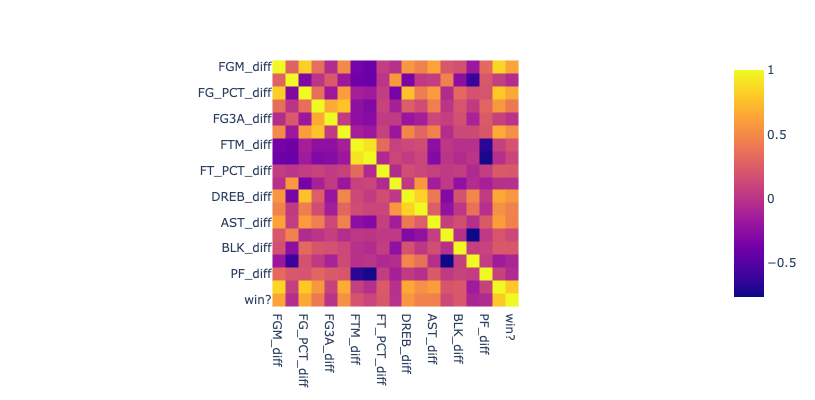

In [47]:
# correlation between stats

columns = ['FGM_diff', 'FGA_diff',
       'FG_PCT_diff', 'FG3M_diff', 'FG3A_diff', 'FG3_PCT_diff', 'FTM_diff',
       'FTA_diff', 'FT_PCT_diff', 'OREB_diff', 'DREB_diff', 'REB_diff',
       'AST_diff', 'STL_diff', 'BLK_diff', 'TOV_diff', 'PF_diff', 'PTS_diff',
       'win?']

gamelog_2020_21.corr = gamelog_2020_21[columns].corr().round(5)

plt.rcParams['figure.figsize'] = [5, 20]
px.imshow(gamelog_2020_21.corr, width=800, height=400)

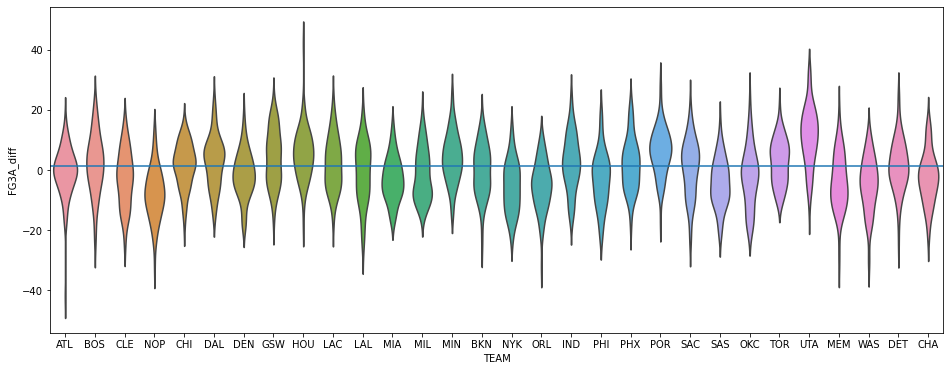

In [18]:
# plot violin plot
stats_col = 'FG_PCT'
%matplotlib inline
plt.figure(figsize=(16, 6))
graph = sns.violinplot(data=gamelog_2020_21, y='FG3A_diff', x='TEAM' ,inner=None)
graph.axhline(1.25)
plt.show()

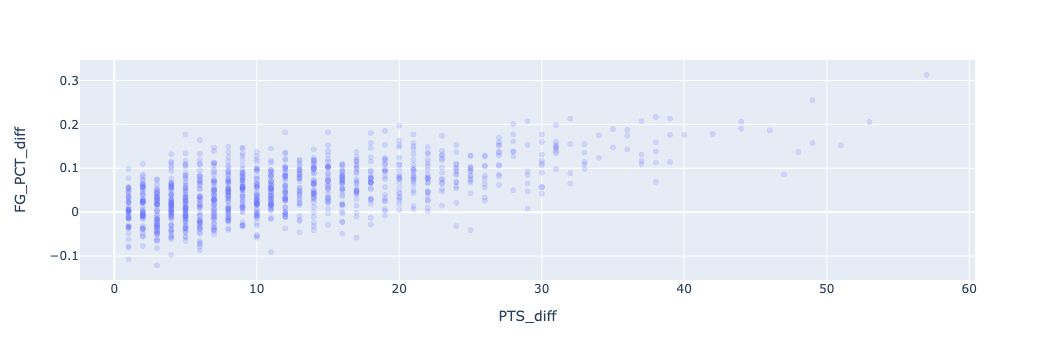

In [70]:
stats_col = 'FG_PCT'
px.scatter(winners, x='PTS_diff', y=stats_col+'_diff', opacity=0.2)

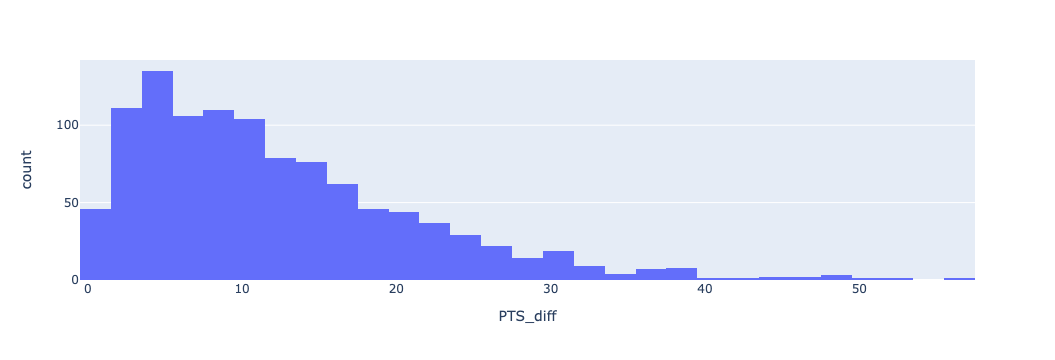

In [53]:
px.histogram(winners, x='PTS_diff')

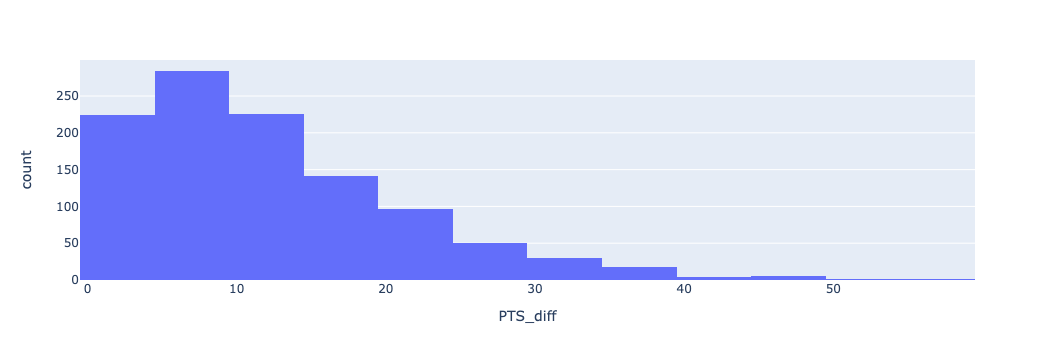

In [42]:
px.histogram(winners, x='PTS_diff', nbins=20)

<AxesSubplot:xlabel='STL_diff', ylabel='PTS_diff'>

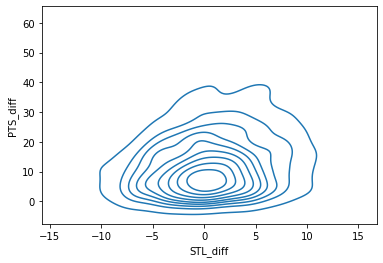

In [33]:
sns.kdeplot(data=winners, x='STL_diff', y='PTS_diff')